# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Install Datasets and Upgrade TensorFlow

To ensure we can download the latest version of the `oxford_flowers102` dataset, let's first install both `tensorflow-datasets` and `tfds-nightly`.
* `tensorflow-datasets` is the stable version that is released on a cadence of every few months
* `tfds-nightly` is released every day and has the latest version of the datasets

We'll also upgrade TensorFlow to ensure we have a version that is compatible with the latest version of the dataset.

In [ ]:
%pip  install tensorflow-datasets --user
%pip  install tfds-nightly
%pip  install --upgrade tensorflow
%pip install tensorflow-hub
%pip install keras

Python interpreter will be restarted.
Requirement already satisfied: tensorflow-datasets in /root/.local/lib/python3.7/site-packages (4.6.0)
Requirement already satisfied: typing-extensions; python_version < "3.8" in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (4.3.0)
Requirement already satisfied: six in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (1.14.0)
Requirement already satisfied: toml in /root/.local/lib/python3.7/site-packages (from tensorflow-datasets) (0.10.2)
Requirement already satisfied: requests>=2.19.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (2.22.0)
Collecting protobuf>=3.12.2
 Using cached protobuf-4.21.6-cp37-abi3-manylinux2014_x86_64.whl (408 kB)
Requirement already satisfied: importlib-resources; python_version < "3.9" in /root/.local/lib/python3.7/site-packages (from tensorflow-datasets) (5.9.0)
Requirement already satisfied: tqdm in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (4.42.1)
Requirement already satisfied: tensorflow-metadata in /root/.local/lib/python3.7/site-packages (from tensorflow-datasets) (1.10.0)
Requirement already satisfied: dill in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (0.3.1.1)
Requirement already satisfied: termcolor in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (1.1.0)
Requirement already satisfied: promise in /root/.local/lib/python3.7/site-packages (from tensorflow-datasets) (2.3)
Requirement already satisfied: numpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (1.18.1)
Requirement already satisfied: absl-py in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from tensorflow-datasets) (0.9.0)
Requirement already satisfied: etils[epath] in /root/.local/lib/python3.7/site-packages (from tensorflow-datasets) (0.8.0)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from requests>=2.19.0->tensorflow-datasets) (1.25.8)
Requirement already satisfied: idna<2.9,>=2.5 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from requests>=2.19.0->tensorflow-datasets) (2.8)
Requirement already satisfied: chardet<3.1.0,>=3.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from requests>=2.19.0->tensorflow-datasets) (3.0.4)
Requirement already satisfied: certifi>=2017.4.17 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from requests>=2.19.0->tensorflow-datasets) (2020.6.20)
Requirement already satisfied: zipp>=3.1.0; python_version < "3.10" in /local_disk0/.ephemeral_nfs/envs/pythonEnv-b0da9987-b958-47f6-8822-f30d6e6f8d4b/lib/python3.7/site-packages (from importlib-resources; python_version < "3.9"->tensorflow-datasets) (3.8.1)
Requirement already satisfied: googleapis-common-protos<2,>=1.52.0 in /root/.local/lib/python3.7/site-packages (from tensorflow-metadata->tensorflow-datasets) (1.56.4)
ERROR: mlflow 1.11.0 requires alembic<=1.4.1, which is not installed.
ERROR: mlflow 1.11.0 requires prometheus-flask-exporter, which is not installed.
ERROR: tensorflow-metadata 1.10.0 has requirement protobuf<4,>=3.13, but you'll have protobuf 4.21.6 which is incompatible.
ERROR: mlflow 1.1

After the above installations have finished **be sure to restart the kernel**. You can do this by going to **Kernel > Restart**.

In [ ]:
# Import TensorFlow 
import tensorflow as tf
import tensorflow_datasets as tfds
import tensorflow_hub as hub

# Ignore some warnings that are not relevant (you can remove this if you prefer)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# TODO: Make all other necessary imports.
import matplotlib.pyplot as plt
import json
import numpy as np
import pandas as pd
import boto3
import keras
from PIL import Image

In [ ]:
# Some other recommended settings:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tfds.disable_progress_bar()

## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [ ]:
# Done: Load the dataset with TensorFlow Datasets. Hint: use tfds.load()
dataset, dataset_info = tfds.load('oxford_flowers102',
                                  as_supervised = True,
                                  with_info = True
                                 )

print('dataset has type:', type(dataset))
print('\nThe keys of dataset are:', list(dataset.keys()))


# Done: Create a training set, a validation set and a test set.
training_set, test_set, validation_set = dataset['train'], dataset['test'], dataset['validation']
class_names = dataset_info.features["label"].names
n_classes = dataset_info.features['label'].num_classes

dataset has type: <class 'dict'>

The keys of dataset are: ['train', 'test', 'validation']

In [ ]:
# Used this to export my json file which will align with the model training
json.dumps(dict([(idx, name) for idx, name in enumerate(class_names)]))

Out[5]: '{"0": "pink primrose", "1": "hard-leaved pocket orchid", "2": "canterbury bells", "3": "sweet pea", "4": "english marigold", "5": "tiger lily", "6": "moon orchid", "7": "bird of paradise", "8": "monkshood", "9": "globe thistle", "10": "snapdragon", "11": "colt\'s foot", "12": "king protea", "13": "spear thistle", "14": "yellow iris", "15": "globe-flower", "16": "purple coneflower", "17": "peruvian lily", "18": "balloon flower", "19": "giant white arum lily", "20": "fire lily", "21": "pincushion flower", "22": "fritillary", "23": "red ginger", "24": "grape hyacinth", "25": "corn poppy", "26": "prince of wales feathers", "27": "stemless gentian", "28": "artichoke", "29": "sweet william", "30": "carnation", "31": "garden phlox", "32": "love in the mist", "33": "mexican aster", "34": "alpine sea holly", "35": "ruby-lipped cattleya", "36": "cape flower", "37": "great masterwort", "38": "siam tulip", "39": "lenten rose", "40": "barbeton daisy", "41": "daffodil", "42": "sword lily", "43": "poinsettia", "44": "bolero deep blue", "45": "wallflower", "46": "marigold", "47": "buttercup", "48": "oxeye daisy", "49": "common dandelion", "50": "petunia", "51": "wild pansy", "52": "primula", "53": "sunflower", "54": "pelargonium", "55": "bishop of llandaff", "56": "gaura", "57": "geranium", "58": "orange dahlia", "59": "pink-yellow dahlia?", "60": "cautleya spicata", "61": "japanese anemone", "62": "black-eyed susan", "63": "silverbush", "64": "californian poppy", "65": "osteospermum", "66": "spring crocus", "67": "bearded iris", "68": "windflower", "69": "tree poppy", "70": "gazania", "71": "azalea", "72": "water lily", "73": "rose", "74": "thorn apple", "75": "morning glory", "76": "passion flower", "77": "lotus", "78": "toad lily", "79": "anthurium", "80": "frangipani", "81": "clematis", "82": "hibiscus", "83": "columbine", "84": "desert-rose", "85": "tree mallow", "86": "magnolia", "87": "cyclamen", "88": "watercress", "89": "canna lily", "90": "hippeastrum", "91": "bee balm", "92": "ball moss", "93": "foxglove", "94": "bougainvillea", "95": "camellia", "96": "mallow", "97": "mexican petunia", "98": "bromelia", "99": "blanket flower", "100": "trumpet creeper", "101": "blackberry lily"}'

## Explore the Dataset

In [ ]:
# Done: Get the number of examples in each set from the dataset info.
print('The train set has %s examples' % dataset_info.splits['train'].num_examples)
print('The test set has %s examples' % dataset_info.splits['test'].num_examples)
print('The validation set has %s examples' % dataset_info.splits['validation'].num_examples)

# # Done: Get the number of classes in the dataset from the dataset info.
print('The dataset has %s classes.' % dataset_info.features['label'].num_classes)

The train set has 1020 examples
The test set has 6149 examples
The validation set has 1020 examples
The dataset has 102 classes.

In [ ]:
# Done: Print the shape and corresponding label of 3 images in the training set.
for image, label in training_set.take(3):
    print('The images in the training set have:\n\u2022 shape:', image.shape, '\n\u2022 class_name:', class_names[label], '\n\u2022 label:', label)

The images in the training set have:
• shape: (500, 667, 3) 
• class_name: water lily 
• label: tf.Tensor(72, shape=(), dtype=int64)
The images in the training set have:
• shape: (500, 666, 3) 
• class_name: desert-rose 
• label: tf.Tensor(84, shape=(), dtype=int64)
The images in the training set have:
• shape: (670, 500, 3) 
• class_name: gazania 
• label: tf.Tensor(70, shape=(), dtype=int64)

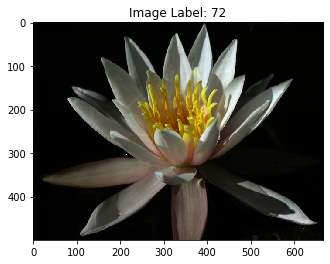

In [ ]:
# Done: Plot 1 image from the training set. 
# Set the title of the plot to the corresponding image label.
for image, label in training_set.take(1):
    plt.imshow(image, cmap= plt.cm.binary)
    plt.title(f"Image Label: {label}")

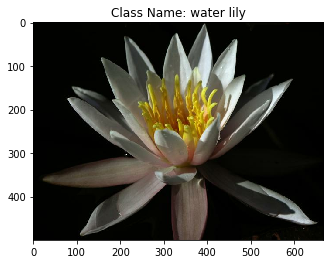

In [ ]:
# Done: Plot 1 image from the training set. 
# Set the title of the plot to the corresponding image label.
for image, label in training_set.take(1):
    plt.imshow(image, cmap= plt.cm.binary)
    plt.title(f"Class Name: {class_names[label]}")

## Create Pipeline

In [ ]:
# TODO: Create a pipeline for each set.
batch_size = 32
image_size = 224

num_training_examples = dataset_info.splits['train'].num_examples

def preprocess(image, label):
    resized_image = tf.image.resize(image, [image_size, image_size])
    final_image = keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

#run preprocessing on the training, validation and testing data
training_batches = training_set.shuffle(num_training_examples//4).map(preprocess).batch(batch_size).prefetch(1)
validation_batches = validation_set.map(preprocess).batch(batch_size).prefetch(1)
testing_batches = test_set.map(preprocess).batch(batch_size).prefetch(1)

# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [ ]:
# Done: Build and train your network.
base_model = keras.applications.mobilenet_v2.MobileNetV2(include_top=False)
avg = keras.layers.GlobalAveragePooling2D()(base_model.output)
output = keras.layers.Dense(n_classes, activation="softmax")(avg)
model = keras.Model(inputs=base_model.input, outputs=output)

for layer in base_model.layers:
  layer.trainable=False
NUM_EPOCHS = 5
optimizer = keras.optimizers.SGD(lr=0.2, momentum=0.9, decay=0.01)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(training_batches, epochs=NUM_EPOCHS, validation_data = validation_batches)

WARNING:tensorflow:`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
WARNING:tensorflow:`input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
Epoch 1/5
 1/32 [..............................] - ETA: 1:27 - loss: 5.0284 - accuracy: 0.0000e+00 2/32 [>.............................] - ETA: 10s - loss: 6.8257 - accuracy: 0.0000e+00  3/32 [=>............................] - ETA: 9s - loss: 7.3096 - accuracy: 0.0000e+00  4/32 [==>...........................] - ETA: 9s - loss: 7.8854 - accuracy: 0.0078  5/32 [===>..........................] - ETA: 9s - loss: 8.5360 - accuracy: 0.0250 6/32 [====>.........................] - ETA: 8s - loss: 8.3090 - accuracy: 0.0312 7/32 [=====>........................] - ETA: 8s - loss: 8.2003 - accuracy: 0.0446 8/32 [======>.......................] - ETA: 7s - loss: 8.0265 - accuracy: 0.0508 9/32 [=======>......................] - ETA: 7s - loss: 7.9930 - accuracy: 0.079910/32 [========>.....................] - ETA: 7s - loss: 7.9796 - accuracy: 0.081211/32 [=========>....................] - ETA: 6s - loss: 8.8525 - accuracy: 0.096612/32 [==========>...................] - ETA: 6s - loss: 8.8443 - accuracy: 0.091113/32 [===========>..................] - ETA: 6s - loss: 9.0509 - accuracy: 0.098614/32 [============>.................] - ETA: 5s - loss: 8.9129 - accuracy: 0.116115/32 [=============>................] - ETA: 5s - loss: 8.7626 - accuracy: 0.122916/32 [==============>...............] - ETA: 5s - loss: 8.5552 - accuracy: 0.127017/32 [==============>...............] - ETA: 4s - loss: 8.9415 - accuracy: 0.139718/32 [===============>..............] - ETA: 4s - loss: 9.0397 - accuracy: 0.145819/32 [================>.............] - ETA: 4s - loss: 9.6807 - accuracy: 0.159520/32 [=================>............] - ETA: 3s - loss: 9.6578 - accuracy: 0.168821/32 [==================>...........] - ETA: 3s - loss: 9.6607 - accuracy: 0.180122/32 [===================>..........] - ETA: 3s - loss: 9.9035 - accuracy: 0.1832

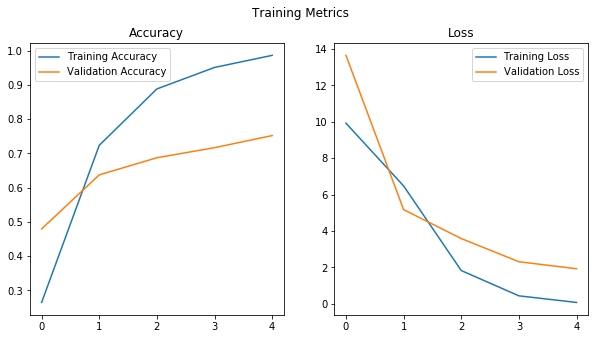

In [ ]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.
#source : https://stackoverflow.com/questions/36952763/how-to-return-history-of-validation-loss-in-keras
train_loss = history.history['loss']
val_loss   = history.history['val_loss']
train_acc  = history.history['accuracy']
val_acc    = history.history['val_accuracy']
xc         = range(NUM_EPOCHS)

fig, ax = plt.subplots(figsize=(10,5), ncols=2)
ax[0].plot(xc, train_acc, label='Training Accuracy')
ax[0].plot(xc, val_acc, label='Validation Accuracy')
ax[0].legend()
ax[0].set_title('Accuracy')
ax[1].plot(xc, train_loss, label='Training Loss')
ax[1].plot(xc, val_loss, label='Validation Loss')
ax[1].legend()
ax[1].set_title('Loss')
fig.suptitle('Training Metrics')

## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [ ]:
# Done: Print the loss and accuracy values achieved on the entire test set.
loss, accuracy = model.evaluate(testing_batches)

print('\nLoss on the TEST Set: {:,.3f}'.format(loss))
print('Accuracy on the TEST Set: {:.3%}'.format(accuracy))

1/193 [..............................] - ETA: 1:34 - loss: 1.8977 - accuracy: 0.8125 2/193 [..............................] - ETA: 1:00 - loss: 1.7965 - accuracy: 0.7812 3/193 [..............................] - ETA: 1:02 - loss: 1.7696 - accuracy: 0.7604 4/193 [..............................] - ETA: 1:03 - loss: 1.8325 - accuracy: 0.7422 5/193 [..............................] - ETA: 1:03 - loss: 1.9062 - accuracy: 0.7375 6/193 [..............................] - ETA: 1:02 - loss: 1.9942 - accuracy: 0.7292 7/193 [>.............................] - ETA: 1:01 - loss: 2.0186 - accuracy: 0.7232 8/193 [>.............................] - ETA: 1:00 - loss: 1.9899 - accuracy: 0.7305 9/193 [>.............................] - ETA: 59s - loss: 1.9959 - accuracy: 0.7257  10/193 [>.............................] - ETA: 58s - loss: 2.1088 - accuracy: 0.7250 11/193 [>.............................] - ETA: 58s - loss: 2.1911 - accuracy: 0.7244 12/193 [>.............................] - ETA: 57s - loss: 2.2181 - accuracy: 0.7135 13/193 [=>............................] - ETA: 57s - loss: 2.3409 - accuracy: 0.7019 14/193 [=>............................] - ETA: 57s - loss: 2.3538 - accuracy: 0.6964 15/193 [=>............................] - ETA: 56s - loss: 2.3291 - accuracy: 0.7000 16/193 [=>............................] - ETA: 56s - loss: 2.2802 - accuracy: 0.7051 17/193 [=>............................] - ETA: 56s - loss: 2.3593 - accuracy: 0.7040 18/193 [=>............................] - ETA: 56s - loss: 2.2870 - accuracy: 0.7066 19/193 [=>............................] - ETA: 55s - loss: 2.2613 - accuracy: 0.7122 20/193 [==>...........................] - ETA: 55s - loss: 2.2982 - accuracy: 0.7125 21/193 [==>...........................] - ETA: 54s - loss: 2.3159 - accuracy: 0.7128 22/193 [==>...........................] - ETA: 54s - loss: 2.3561 - accuracy: 0.7145 23/193 [==>...........................] - ETA: 54s - loss: 2.3118 - accuracy: 0.7174 24/193 [==>...........................] - ETA: 54s - loss: 

## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [ ]:
# TODO: Save your trained model as a Keras model.

model.save('my_model_20220914.h5')  # creates a HDF5 file 'my_model.h5'

del model  # deletes the existing model

## Load the Keras Model

Load the Keras model you saved above.

In [ ]:
# Load the Keras model
# returns a compiled model
# identical to the previous one

model = tf.keras.models.load_model('my_model_20220914.h5',  custom_objects={'KerasLayer':hub.KerasLayer})

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [ ]:
# Done: Create the process_image function
def process_image(image_path):
    image = Image.open(image_path)
    image = np.asarray(image)
    image = tf.convert_to_tensor(image)
    image = tf.image.resize(image, (224, 224))
    image /= 225
    return image

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size.

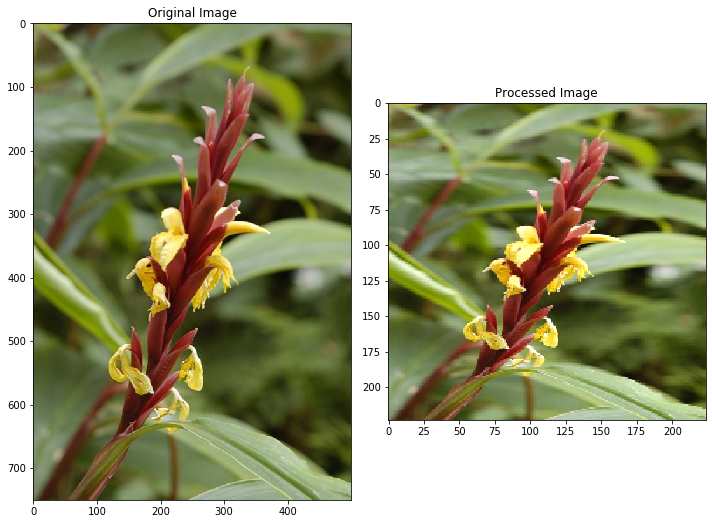

In [ ]:
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
# image_path = 'cautleya_spicata.jpg' #this was my location 

processed_test_image = process_image(image_path)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(np.asarray(Image.open(image_path)))
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension.

In [ ]:
# TODO: Create the predict function
def predict(image_path, model, top_k):
    processed_test_image = process_image(image_path)
    image_batch = np.expand_dims(processed_test_image, axis=0)
    probs = model.predict(image_batch)
    index = [str(i) for i in range(len(probs[0]))]
    temp = sorted(zip(probs[0], index, class_names), reverse=True)[:top_k]
    probs = [i[0] for i in temp]
    classes = [i[1] for i in temp]
    names = [i[2] for i in temp]
    return probs, classes#, names

def other_predict(image_path, model, top_k):
    processed_test_image = process_image(image_path)
    image_batch = np.expand_dims(processed_test_image, axis=0)
    probs = model.predict(image_batch)
    index = [str(i) for i in range(len(probs[0]))]
    temp = sorted(zip(probs[0], index, class_names), reverse=True)[:top_k]
    probs = [i[0] for i in temp]
    classes = [i[1] for i in temp]
    names = [i[2] for i in temp]
    return probs, classes, names
  


In [ ]:
probs, classes, names = other_predict(image_path, model, 5)
print(probs)
print(classes)
print(names)

1/1 [==============================] - ETA: 0s1/1 [==============================] - 1s 656ms/step
[0.99986815, 9.850427e-05, 1.6409518e-05, 9.697566e-06, 2.7847154e-06]
['60', '10', '21', '36', '38']
['cautleya spicata', 'snapdragon', 'pincushion flower', 'cape flower', 'siam tulip']

# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`.

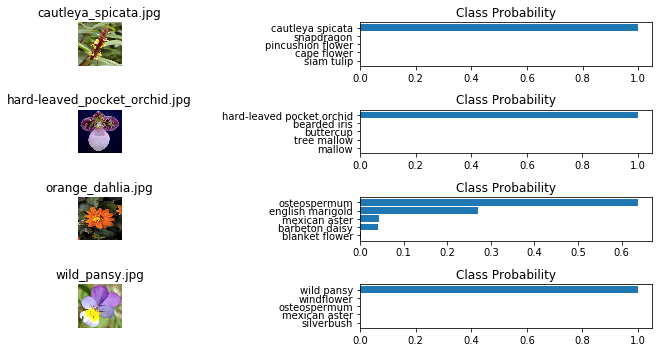

In [ ]:
# Done: Plot the input image along with the top 5 classes
file_names = ['./test_images/cautleya_spicata.jpg', 
              './test_images/hard-leaved_pocket_orchid.jpg',
              './test_images/orange_dahlia.jpg',
              './test_images/wild_pansy.jpg']

#generate multiplot
fig, ax = plt.subplots(ncols=2, figsize=(10,5), nrows=len(file_names))

#loop through files
for idx, image in enumerate(file_names):
    #make predictions
    probs, _, names = other_predict(image, model, 5)
    

    
    #generate picture of the flower on the left side of plot
    ax[idx, 0].imshow(process_image(image), cmap = plt.cm.binary)
    ax[idx, 0].axis('off')
    ax[idx, 0].set_title(image)
    
    #display the probabilities as a bar graph predictions
    ax[idx, 1].barh(names,probs)
    ax[idx, 1].set_title('Class Probability')
    ax[idx, 1].invert_yaxis()
plt.tight_layout()
plt.show()